# EDA project part 1: General analysis of the data
## Real estate data of King County, Washington, USA

Content:
- univariate analysis: stastistical describtion of the data set
- anaysis of the status of the data set
- data distribution
- multivariate analysis: correlation detection


In [2]:
# Import packages
import warnings

warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## First look at data set

In [3]:
# Import Data set
df = pd.read_csv('data/King_County_House_prices_dataset.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [4]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.000,3,2.500,1530,1131,3.000,0.000,0.000,...,8,1530,0.0,2009,0.000,98103,47.699,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.000,4,2.500,2310,5813,2.000,0.000,0.000,...,8,2310,0.0,2014,0.000,98146,47.511,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.000,2,0.750,1020,1350,2.000,0.000,0.000,...,7,1020,0.0,2009,0.000,98144,47.594,-122.299,1020,2007
21595,291310100,1/16/2015,400000.000,3,2.500,1600,2388,2.000,NaN,0.000,...,8,1600,0.0,2004,0.000,98027,47.535,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.000,2,0.750,1020,1076,2.000,0.000,0.000,...,7,1020,0.0,2008,0.000,98144,47.594,-122.299,1020,1357


In [5]:
df.shape

(21597, 21)

The data set consists of 21 columns and 21597 rows.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Columns with missing Data: 
- waterfront
- yr_renovated
- view

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


### Missing values
How do the values and the missing values look like, is there a way to replace them? Start with a visual inspection:

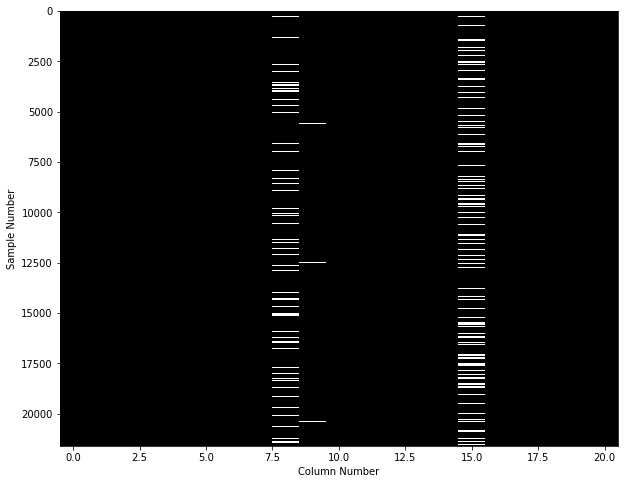

In [8]:
plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

Figure above: white = missing values = NaN, Column 8 = waterfront, Column 9 = view, Column 15 = yr_renovated 

In [9]:
#Find unique values in column waterfront
df['waterfront'].unique()

array([nan,  0.,  1.])

The waterfront column consists of zeros (=False), ones (=True) and NaN

In [10]:
#Find unique values in column view
df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [11]:
#Find unique values in column yr_renovated
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [12]:
df.query('yr_renovated > 0').sort_values('yr_renovated')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13723,4475800065,6/13/2014,459950.000,3,1.750,1850,6869,1.000,0.000,2.000,...,6,1100,750.0,1919,1934.000,98166,47.465,-122.363,1850,10096
6455,148000440,8/18/2014,313300.000,2,1.000,970,4800,1.000,0.000,0.000,...,6,970,0.0,1911,1940.000,98116,47.575,-122.414,1180,5900
7150,2754700170,8/4/2014,443500.000,2,1.000,1330,4140,1.000,0.000,0.000,...,7,930,400.0,1919,1940.000,98115,47.680,-122.306,1410,5100
14846,7625701830,10/23/2014,521000.000,3,2.000,1840,6000,1.000,0.000,0.000,...,6,1840,0.0,1908,1944.000,98136,47.551,-122.392,2010,6000
631,582000135,6/22/2014,565000.000,2,1.750,1330,6000,1.000,NaN,0.000,...,7,960,370.0,1914,1945.000,98199,47.654,-122.396,1620,6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11621,461004730,4/6/2015,717000.000,3,1.000,1150,5000,1.000,0.000,0.000,...,8,1150,0.0,1959,2015.000,98117,47.681,-122.369,1160,5000
11587,7284900030,5/22/2014,850000.000,4,3.250,3090,6744,2.000,0.000,4.000,...,9,3090,0.0,1923,2015.000,98177,47.768,-122.388,2020,6656
15673,3585900190,10/6/2014,825000.000,3,2.500,3400,38400,1.000,0.000,4.000,...,8,1870,1530.0,1955,2015.000,98177,47.761,-122.372,3400,24338
14845,3585900665,6/6/2014,805000.000,5,2.500,4600,19831,1.000,0.000,3.000,...,9,2300,2300.0,1956,2015.000,98177,47.761,-122.378,2890,19831


## Distribution of the column values

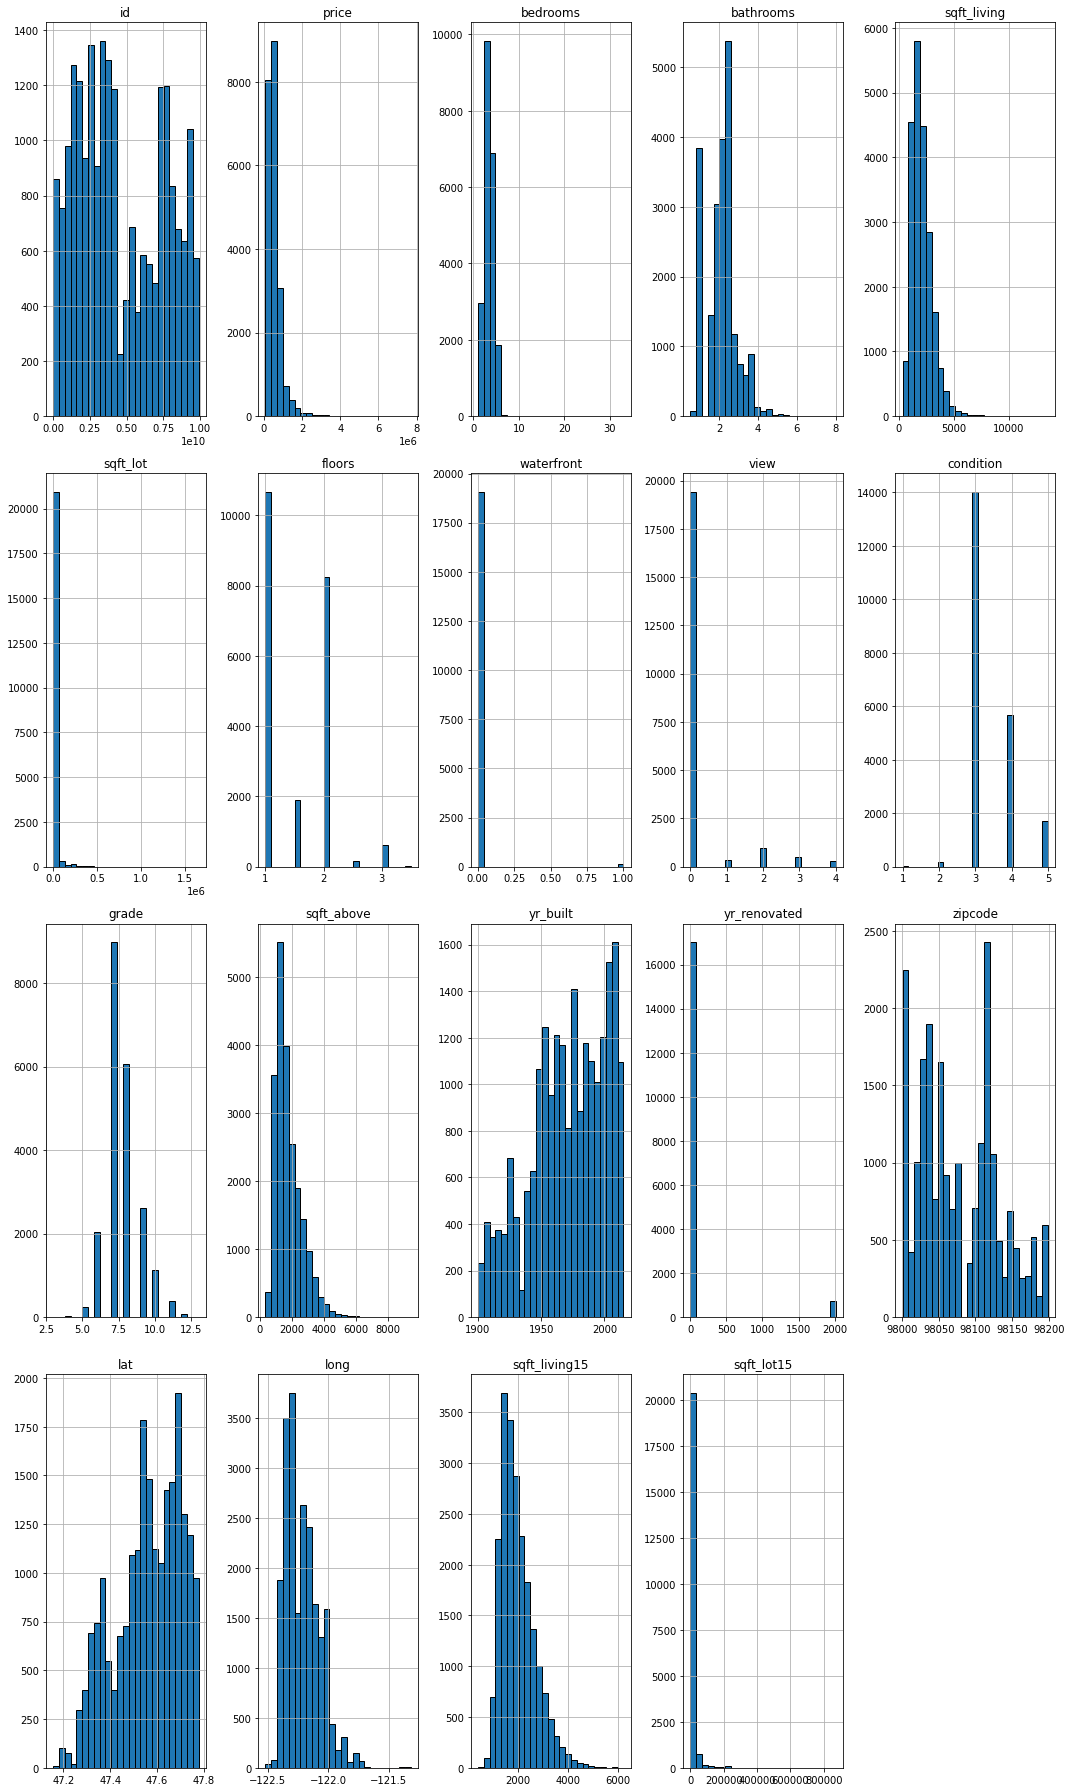

In [18]:
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

## Correlation detection

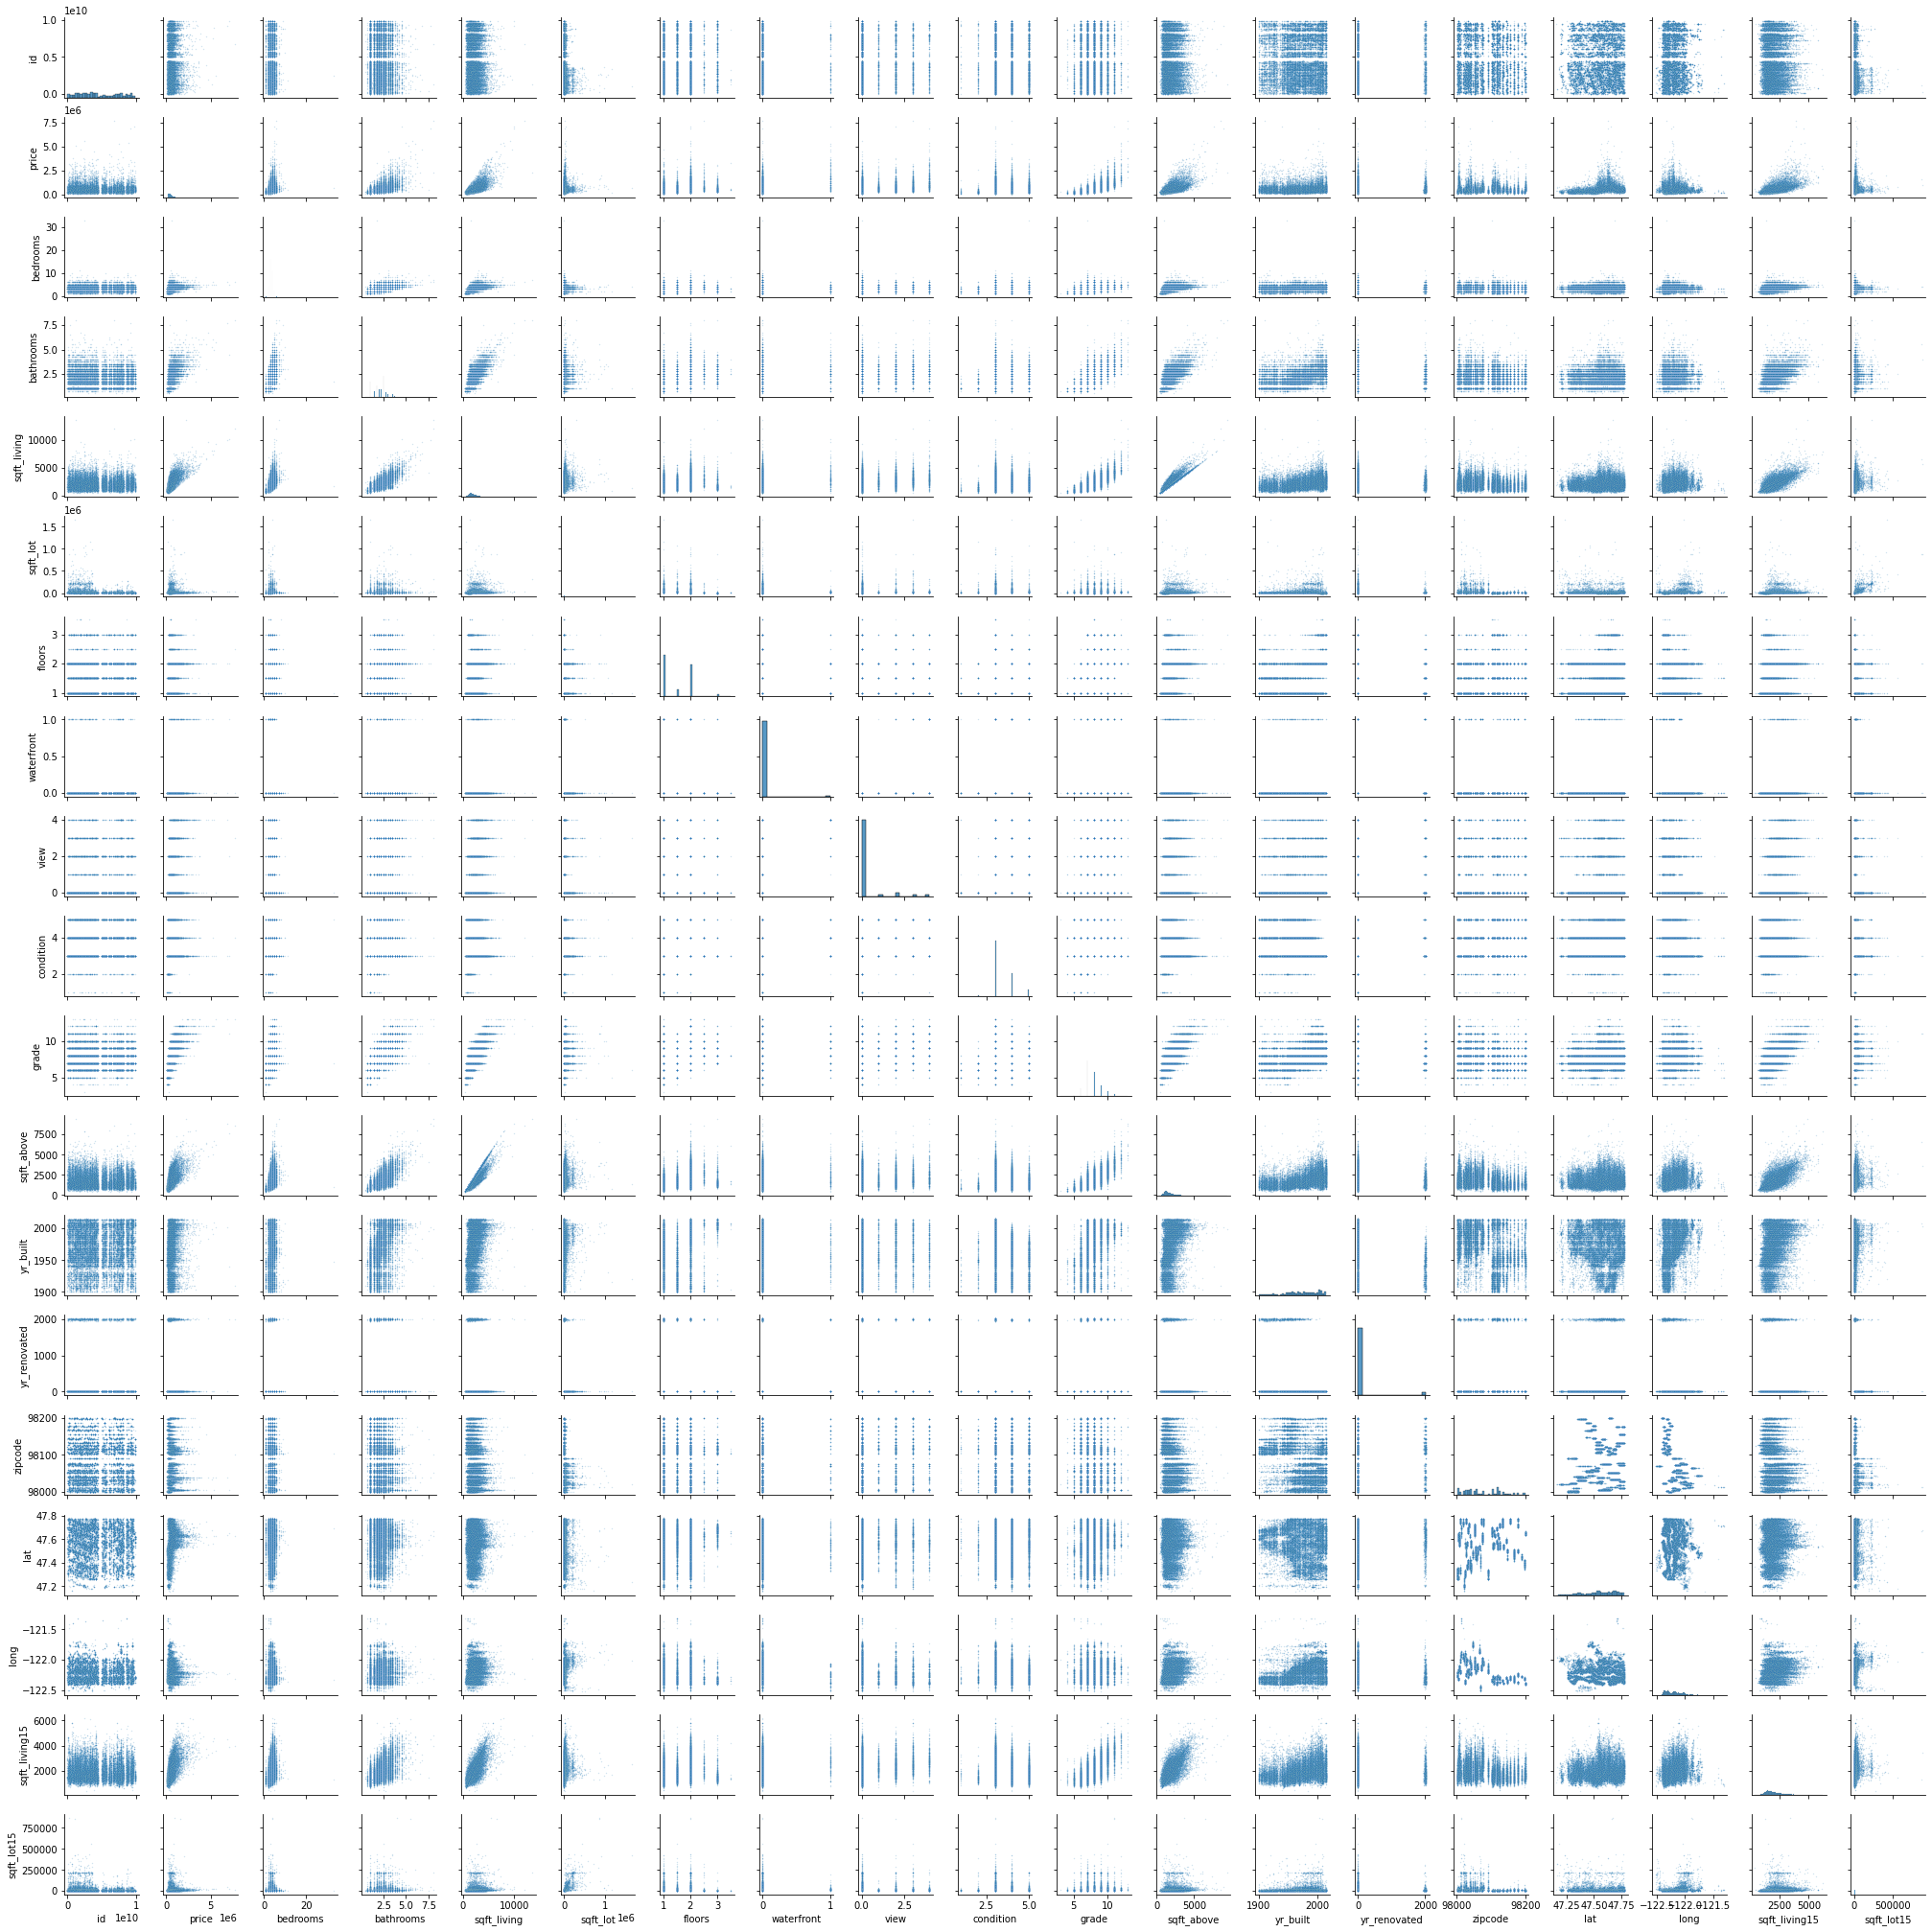

In [20]:
# Correlation plot matrix of every feature of the data set
sns.pairplot(df, height=1.5,
             plot_kws={"s": 2, "alpha": 0.2});

Correlations to look into:
- 

## Research questions and Hypothesis
| Research question     | Hypothesis |
| ----------- | ----------- |
| 1. Are there neighborhoods that are unpopular?        | There is a clear ranking in mean grade per zip code  |
| 2. What is a poor neighborhood?                       | Correlation between price and grade: The lower the grade, the lower the price?|
| 3. Is the price a good indicator for poorness         | The bigger the house, the higher the price? |
|                                                       | The bigger the rooms, the higher the price? |
| 4. Is the grade a good indicator for poorness?        | The lower the price per sqft, the lower the grade?  |
|                                                       | |
|                                                                           | c. The poorer a house, the lower the  |


